# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [112]:
previsao_renda = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')
previsao_renda.corr()

,Unnamed: 0,index,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
Unnamed: 0,1.000000,-0.001868,0.002567,0.004003,0.015612,-0.004328,-0.002146,0.016628,0.019061,0.007646
index,-0.001868,1.000000,-0.007542,-0.099683,0.039734,-0.047971,-0.034574,0.041818,0.130691,-0.001740
posse_de_veiculo,0.002567,-0.007542,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,-0.017617,0.063414
posse_de_imovel,0.004003,-0.099683,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,-0.022499,0.029827
qtd_filhos,0.015612,0.039734,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009544,0.009567
idade,-0.004328,-0.047971,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,-0.011087,0.042570
tempo_emprego,-0.002146,-0.034574,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235
qt_pessoas_residencia,0.016628,0.041818,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,-0.001555,0.020977
mau,0.019061,0.130691,-0.017617,-0.022499,0.009544,-0.011087,-0.047722,-0.001555,1.000000,-0.011577
renda,0.007646,-0.001740,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,-0.011577,1.000000


In [113]:
interesse = ['posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos','idade', 'index', 'renda']
previsao_renda[interesse]

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,index,renda
0,False,True,1,36,8682,3369.24
1,True,True,0,42,12830,6096.14
2,True,True,2,31,2885,5658.98
3,True,False,0,50,16168,7246.69
4,False,False,0,52,12438,4017.37
...,...,...,...,...,...,...
14995,True,True,1,37,3678,1193.29
14996,True,True,1,30,3405,2519.18
14997,True,True,0,40,7944,1586.85
14998,False,True,0,47,16019,6975.39


In [114]:
previsao_renda[interesse].corr()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,index,renda
posse_de_veiculo,1.000000,-0.014727,0.107959,-0.157837,-0.007542,0.063414
posse_de_imovel,-0.014727,1.000000,-0.002525,0.122667,-0.099683,0.029827
qtd_filhos,0.107959,-0.002525,1.000000,-0.364303,0.039734,0.009567
idade,-0.157837,0.122667,-0.364303,1.000000,-0.047971,0.042570
index,-0.007542,-0.099683,0.039734,-0.047971,1.000000,-0.001740
renda,0.063414,0.029827,0.009567,0.042570,-0.001740,1.000000


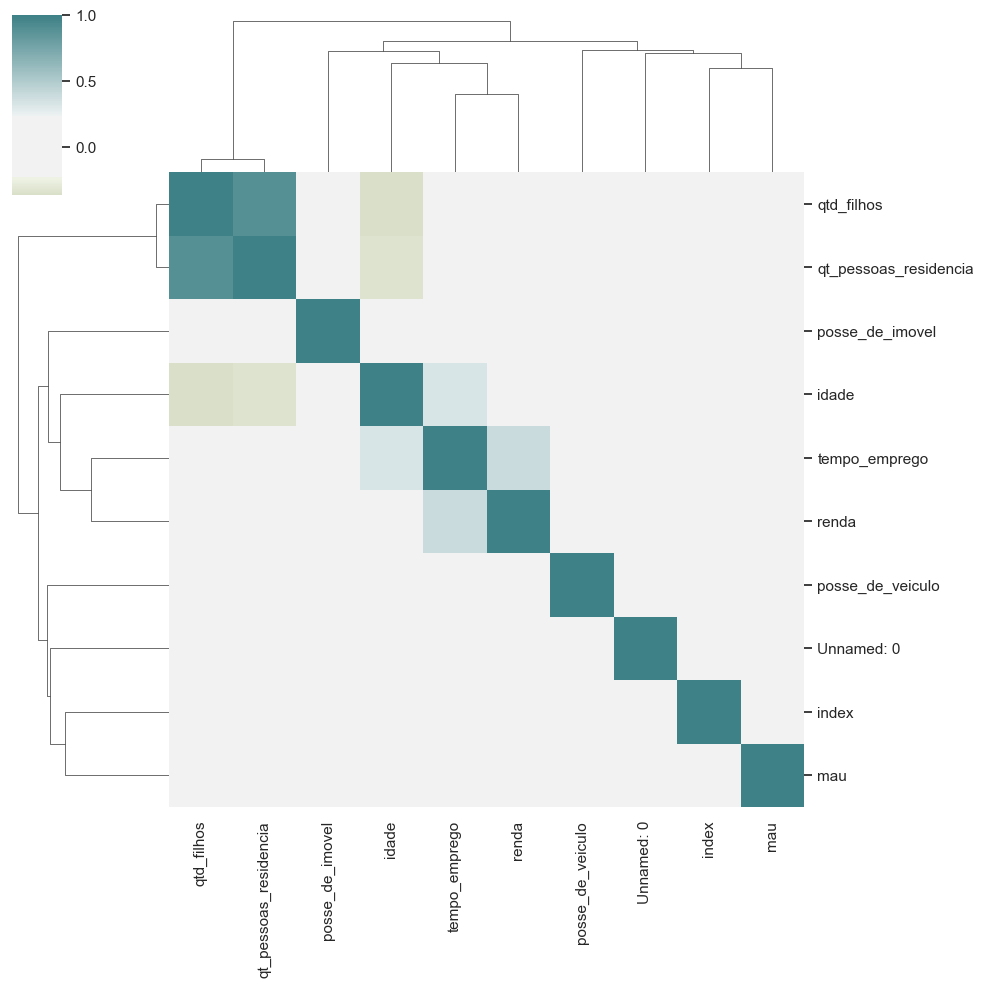

In [115]:
cmap = sns.diverging_palette(h_neg=100, h_pos=200, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(previsao_renda.corr(), figsize=(10, 10), center = 0, cmap=cmap);

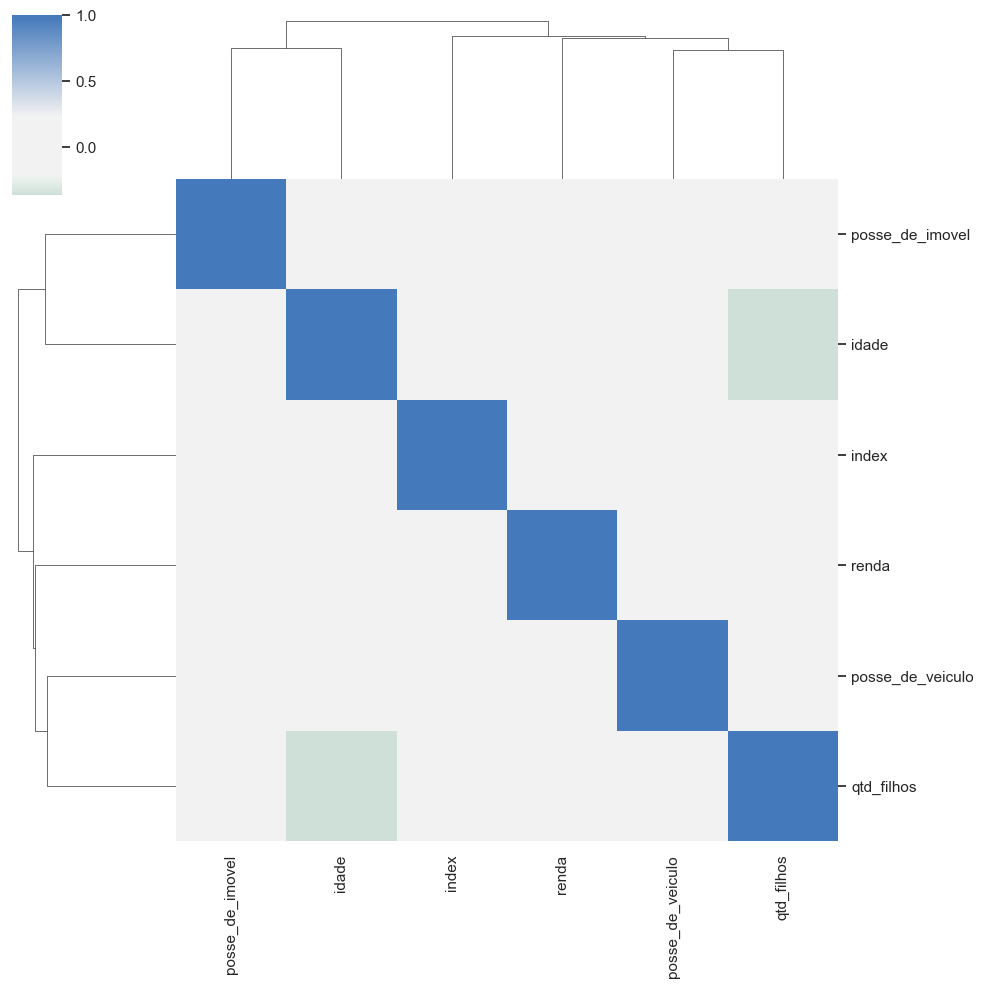

In [116]:
cmap = sns.diverging_palette(h_neg=150, h_pos=250, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(previsao_renda[interesse].corr(), figsize=(10, 10), center = 0, cmap=cmap);

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

In [117]:
previsao_renda.corr()

,Unnamed: 0,index,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
Unnamed: 0,1.000000,-0.001868,0.002567,0.004003,0.015612,-0.004328,-0.002146,0.016628,0.019061,0.007646
index,-0.001868,1.000000,-0.007542,-0.099683,0.039734,-0.047971,-0.034574,0.041818,0.130691,-0.001740
posse_de_veiculo,0.002567,-0.007542,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,-0.017617,0.063414
posse_de_imovel,0.004003,-0.099683,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,-0.022499,0.029827
qtd_filhos,0.015612,0.039734,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009544,0.009567
idade,-0.004328,-0.047971,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,-0.011087,0.042570
tempo_emprego,-0.002146,-0.034574,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235
qt_pessoas_residencia,0.016628,0.041818,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,-0.001555,0.020977
mau,0.019061,0.130691,-0.017617,-0.022499,0.009544,-0.011087,-0.047722,-0.001555,1.000000,-0.011577
renda,0.007646,-0.001740,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,-0.011577,1.000000


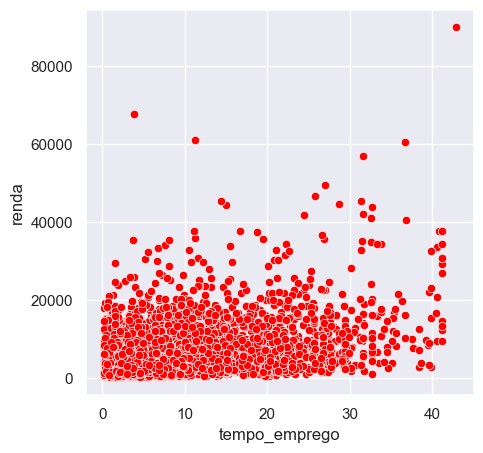

In [118]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=previsao_renda['tempo_emprego'], y=previsao_renda['renda'], color='red');
plt.xlabel('tempo_emprego')
plt.ylabel('renda')
plt.show()

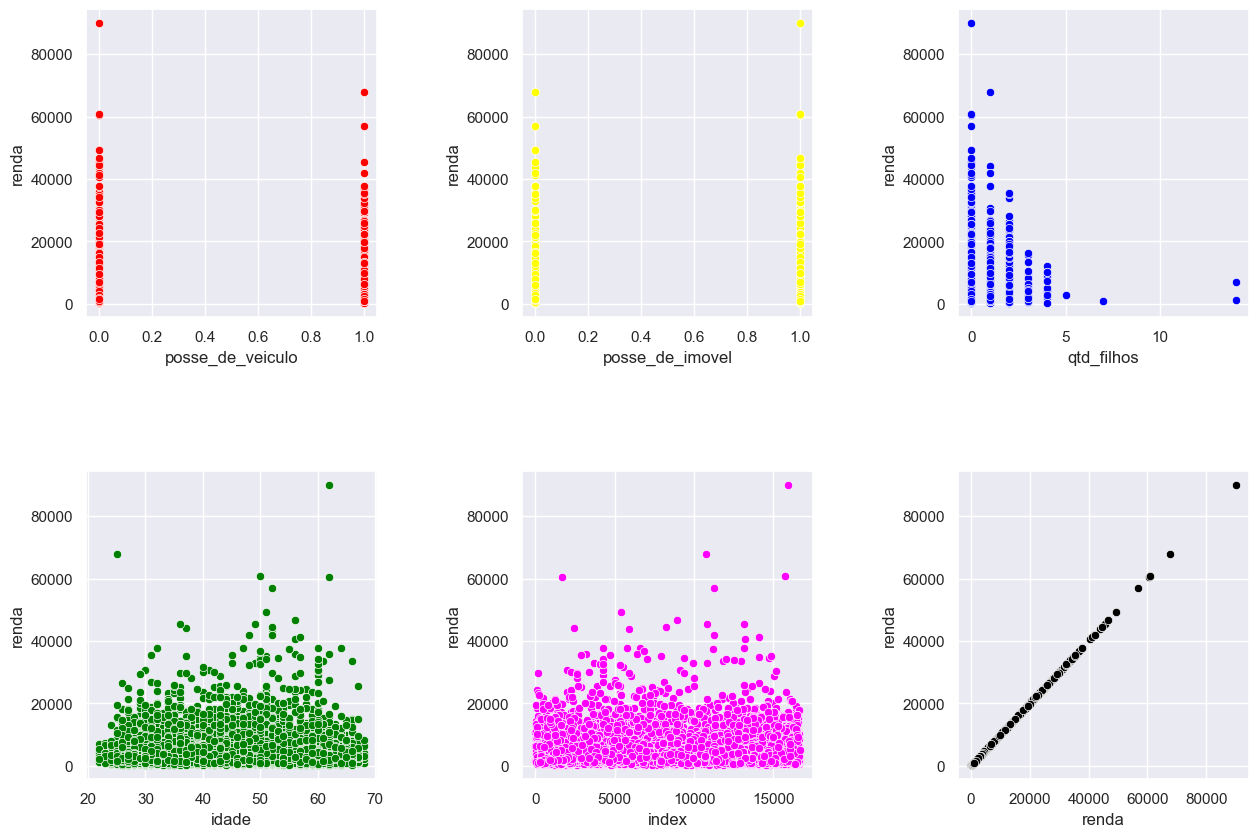

In [119]:
#interesse = ['posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos','idade', 'index', 'renda']
plt.close('all')

plt.rc('figure', figsize=(15, 10))
fig, axes = plt.subplots(2, 3)

sns.scatterplot(ax = axes[0, 0],x=previsao_renda['posse_de_veiculo'], y=previsao_renda['renda'], color='red');
sns.scatterplot(ax = axes[0, 1],x=previsao_renda['posse_de_imovel'], y=previsao_renda['renda'], color='yellow');
sns.scatterplot(ax = axes[0, 2],x=previsao_renda['qtd_filhos'], y=previsao_renda['renda'], color='blue');
sns.scatterplot(ax = axes[1, 0],x=previsao_renda['idade'], y=previsao_renda['renda'], color='green');
sns.scatterplot(ax = axes[1, 1],x=previsao_renda['index'], y=previsao_renda['renda'], color='magenta');
sns.scatterplot(ax = axes[1, 2],x=previsao_renda['renda'], y=previsao_renda['renda'], color='black');

plt.subplots_adjust(wspace=0.5, hspace=0.5)

3) Na su aopinião, há outliers na variável renda?

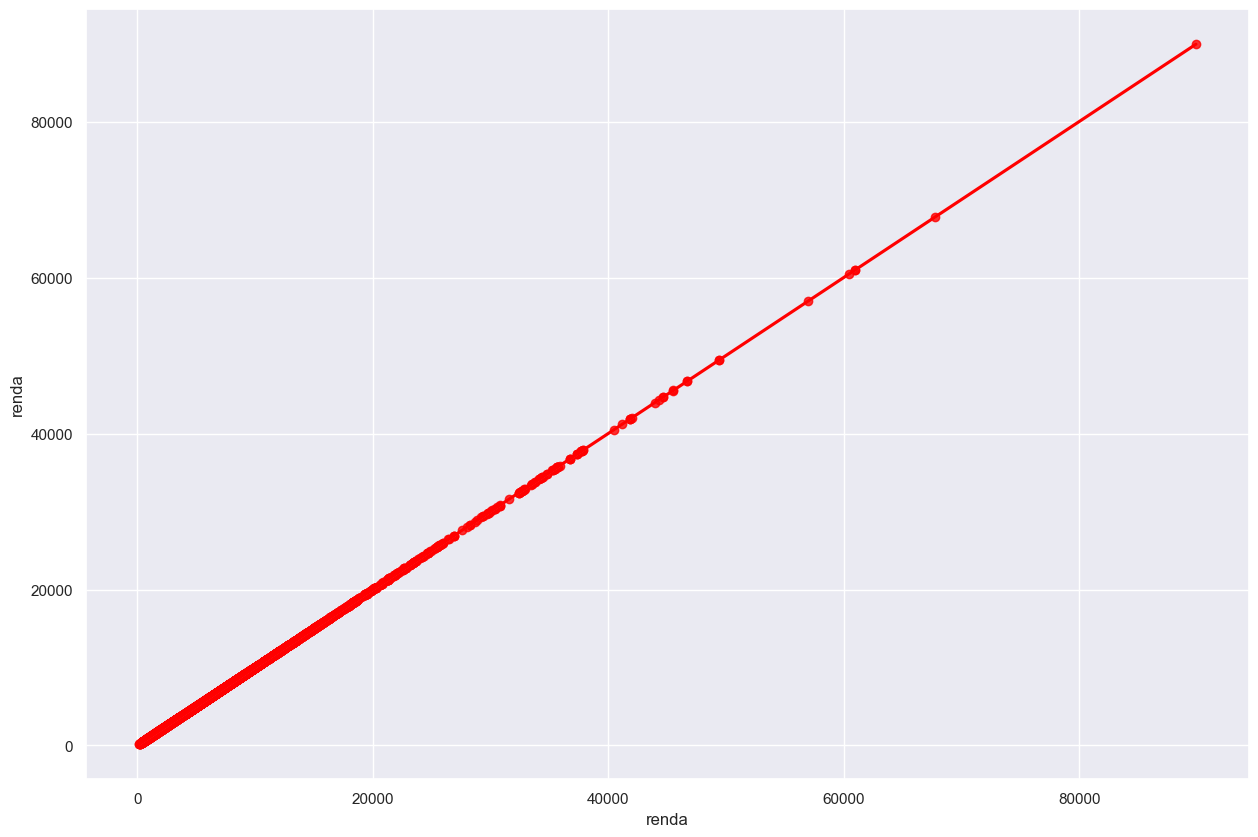

In [120]:
sns.regplot(x=previsao_renda['renda'], y=previsao_renda['renda'], color='red');

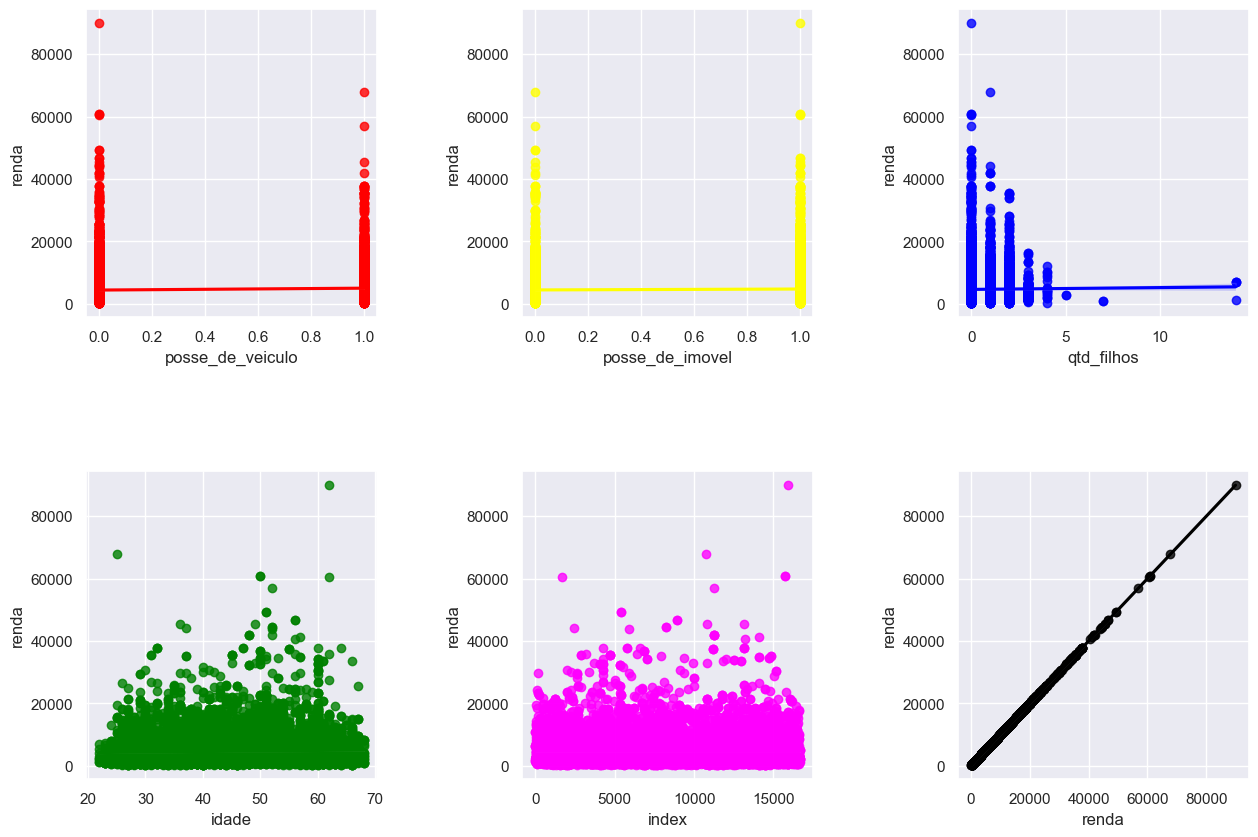

In [121]:
plt.close('all')

plt.rc('figure', figsize=(15, 10))
fig, axes = plt.subplots(2, 3)

sns.regplot(ax = axes[0, 0],x=previsao_renda['posse_de_veiculo'], y=previsao_renda['renda'], color='red');
sns.regplot(ax = axes[0, 1],x=previsao_renda['posse_de_imovel'], y=previsao_renda['renda'], color='yellow');
sns.regplot(ax = axes[0, 2],x=previsao_renda['qtd_filhos'], y=previsao_renda['renda'], color='blue');
sns.regplot(ax = axes[1, 0],x=previsao_renda['idade'], y=previsao_renda['renda'], color='green');
sns.regplot(ax = axes[1, 1],x=previsao_renda['index'], y=previsao_renda['renda'], color='magenta');
sns.regplot(ax = axes[1, 2],x=previsao_renda['renda'], y=previsao_renda['renda'], color='black');

plt.subplots_adjust(wspace=0.5, hspace=0.5)

In [122]:
#o rendimento esta alinhado, mas alguns valores estao acima da média.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

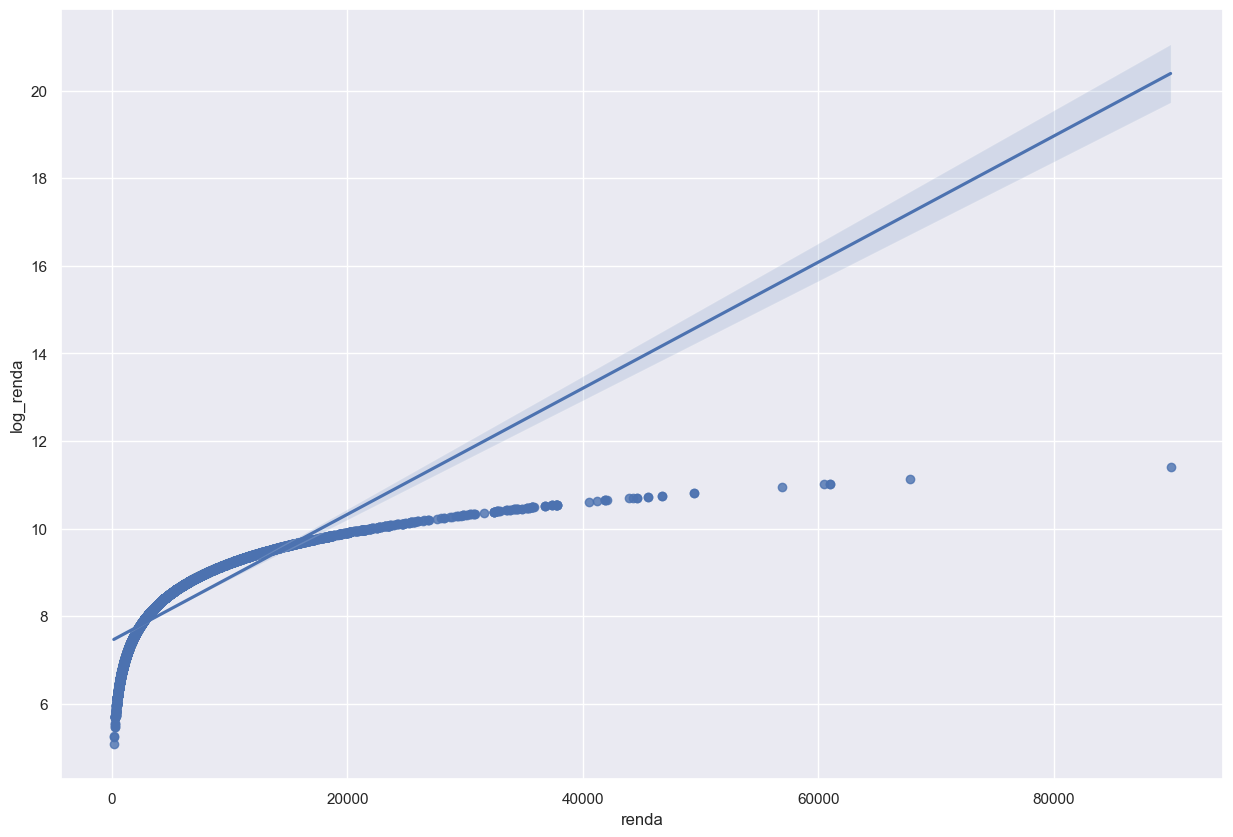

In [156]:
interesse_log = interesse.copy()
interesse_log['log_renda'] = np.log(interesse_log['renda'])

_ = sns.regplot(x='renda', y='log_renda', data= interesse_log)


In [157]:
interesse_log.corr()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,index,renda,log_renda
posse_de_veiculo,1.000000,-0.014727,0.107959,-0.157837,-0.007542,0.063414,0.090529
posse_de_imovel,-0.014727,1.000000,-0.002525,0.122667,-0.099683,0.029827,0.045297
qtd_filhos,0.107959,-0.002525,1.000000,-0.364303,0.039734,0.009567,0.023743
idade,-0.157837,0.122667,-0.364303,1.000000,-0.047971,0.042570,0.024712
index,-0.007542,-0.099683,0.039734,-0.047971,1.000000,-0.001740,0.002993
renda,0.063414,0.029827,0.009567,0.042570,-0.001740,1.000000,0.835734
log_renda,0.090529,0.045297,0.023743,0.024712,0.002993,0.835734,1.000000


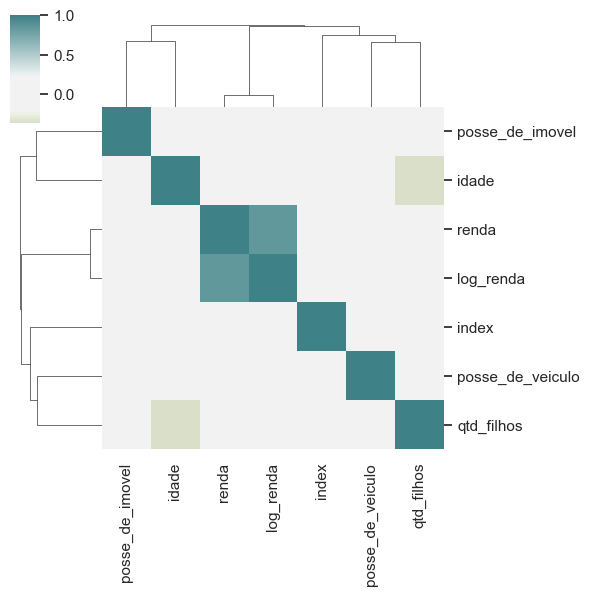

In [167]:
cmap = sns.diverging_palette(h_neg=100, h_pos=200, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(interesse_log.corr(), figsize=(6, 6), center = 0, cmap=cmap);

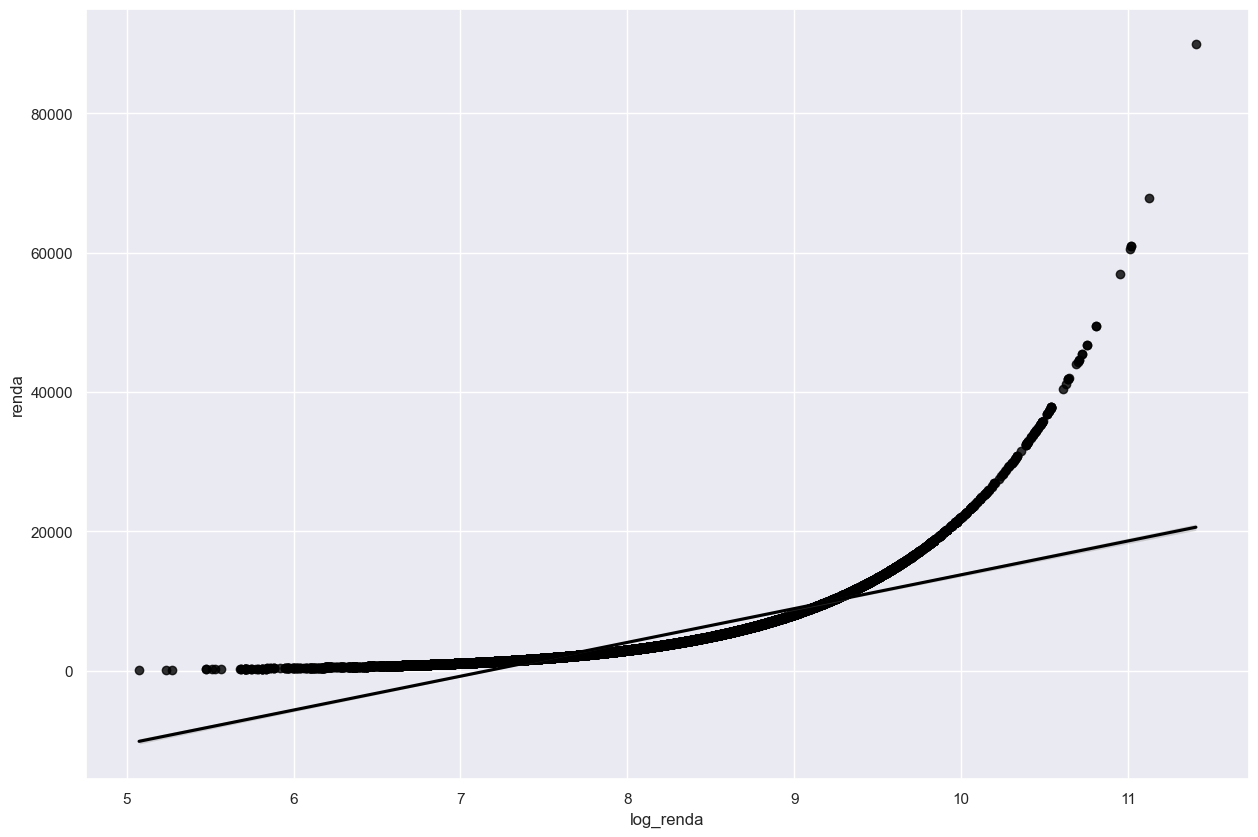

In [166]:
sns.regplot(x=interesse_log['log_renda'], y=interesse_log['renda'], color='black');

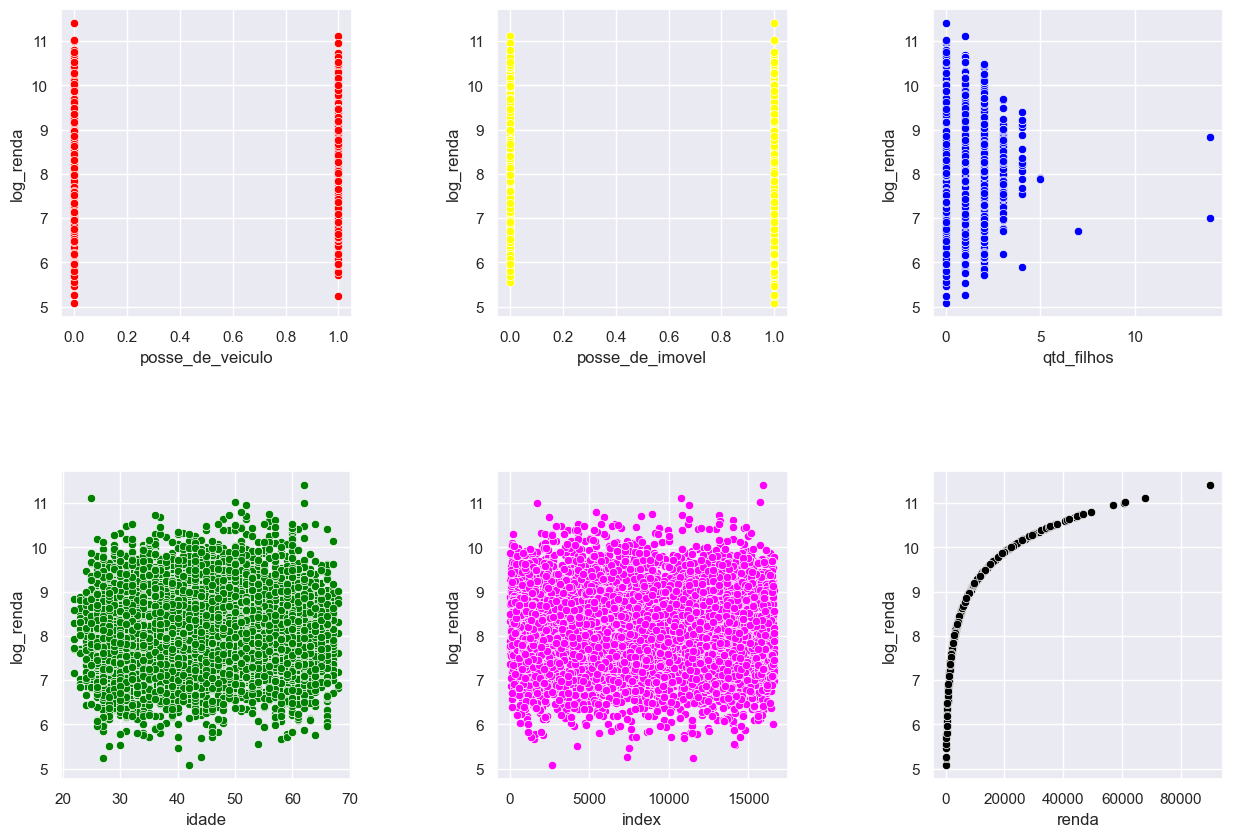

In [164]:
plt.close('all')

plt.rc('figure', figsize=(15, 10))
fig, axes = plt.subplots(2, 3)

sns.scatterplot(ax = axes[0, 0],x=interesse_log['posse_de_veiculo'], y=interesse_log['log_renda'], color='red');
sns.scatterplot(ax = axes[0, 1],x=interesse_log['posse_de_imovel'], y=interesse_log['log_renda'], color='yellow');
sns.scatterplot(ax = axes[0, 2],x=interesse_log['qtd_filhos'], y=interesse_log['log_renda'], color='blue');
sns.scatterplot(ax = axes[1, 0],x=interesse_log['idade'], y=interesse_log['log_renda'], color='green');
sns.scatterplot(ax = axes[1, 1],x=interesse_log['index'], y=interesse_log['log_renda'], color='magenta');
sns.scatterplot(ax = axes[1, 2],x=interesse_log['renda'], y=interesse_log['log_renda'], color='black');

plt.subplots_adjust(wspace=0.5, hspace=0.5)

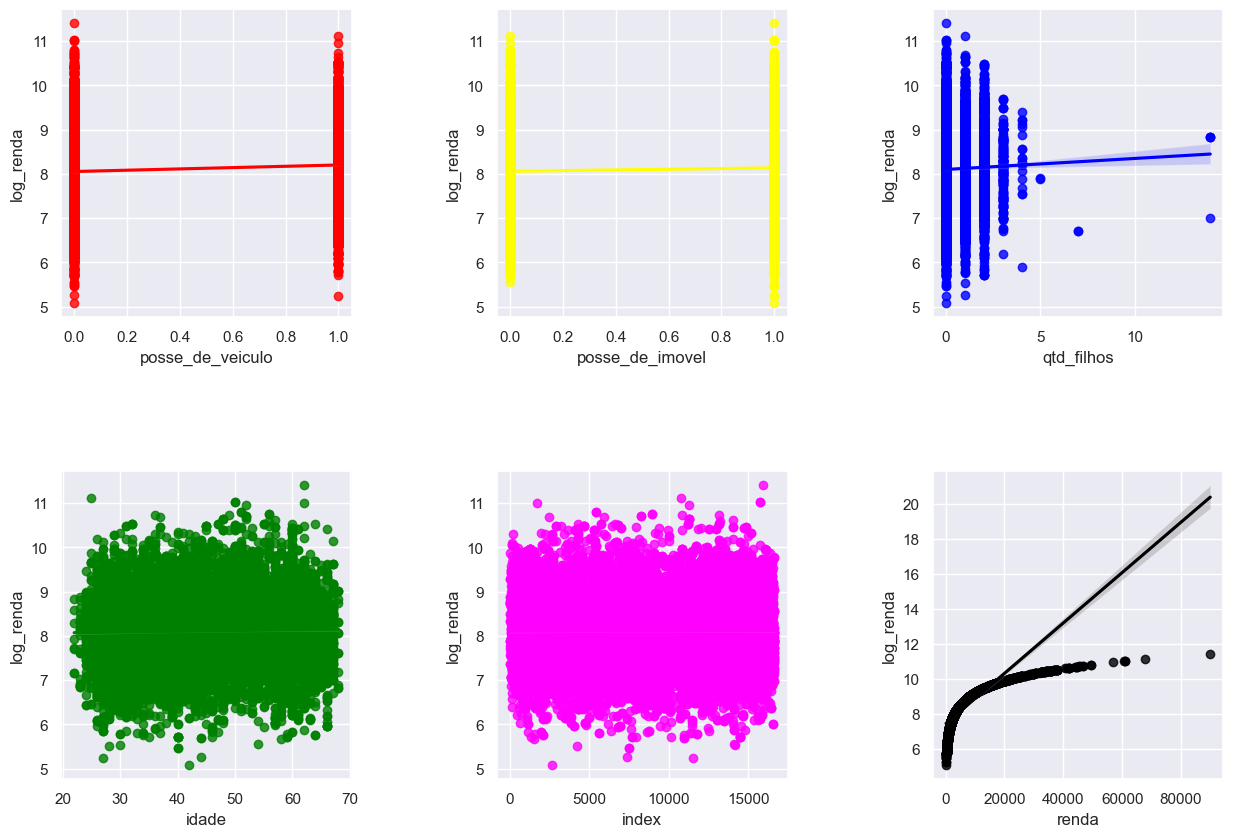

In [165]:
plt.close('all')

plt.rc('figure', figsize=(15, 10))
fig, axes = plt.subplots(2, 3)

sns.regplot(ax = axes[0, 0],x=interesse_log['posse_de_veiculo'], y=interesse_log['log_renda'], color='red');
sns.regplot(ax = axes[0, 1],x=interesse_log['posse_de_imovel'], y=interesse_log['log_renda'], color='yellow');
sns.regplot(ax = axes[0, 2],x=interesse_log['qtd_filhos'], y=interesse_log['log_renda'], color='blue');
sns.regplot(ax = axes[1, 0],x=interesse_log['idade'], y=interesse_log['log_renda'], color='green');
sns.regplot(ax = axes[1, 1],x=interesse_log['index'], y=interesse_log['log_renda'], color='magenta');
sns.regplot(ax = axes[1, 2],x=interesse_log['renda'], y=interesse_log['log_renda'], color='black');

plt.subplots_adjust(wspace=0.5, hspace=0.5)

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [170]:
#Ele pode ajudar em algumas ocasiões, 
#mas ao meu ver sem ele é um pouco mais simples de entender os graficos, 
#talvez ele seja mais acertivo.